In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import time

In [ ]:
from IPython import display

In [ ]:
# Тут я  случайно генерю города
# def Map(n):
#   cities = np.array([(np.random.rand() * 10, np.random.rand() * 10) for i in range(n)])
#   return cities

In [ ]:
# cities = Map(50)

In [ ]:
f = open("hello_400.txt", "r")

In [ ]:
cities = []
for line in f:
  coords = line.split(',')
  if len(coords) > 1:
    cities.append((int(coords[0]), int(coords[1][:len(coords[1]) - 1])))

In [ ]:
class SimulatedAnnealing():
    def __init__(self, t_max, t_min, cities):
        self.t_max = t_max
        self.t_min = t_min
        self.cities = cities.copy()
        self.n = len(self.cities)


    def temp_decr(self, iter_number):
        return self.t_max * 0.1 / iter_number


    def state_change(self, state):
      state_temp = state.copy()
      i = np.random.randint(self.n)
      j = np.random.randint(self.n)

      if i > j:
        state_temp[j:i] = np.flip(state_temp[j:i])

      elif j > i:
        state_temp[i:j] = np.flip(state_temp[i:j])


      return state_temp


    def energy_func(self, state):
        return np.sum([np.sqrt((state[i + 1][0] - state[i][0]) ** 2 + (state[i + 1][1] - state[i][1]) ** 2) for i in range(self.n - 1)]) + np.sqrt((state[self.n - 1][0] - state[0][0]) ** 2 + (state[self.n - 1][1] - state[0][1]) ** 2)


    def prob_count(self, delta, temp):
        return np.random.rand() <= np.exp(- delta / temp)


    def process(self):
        temp = self.t_max
        cur_state = self.cities.copy()
        i = 0
        init_energy_func = self.energy_func(cur_state)

        while temp > self.t_min:
            new_state = self.state_change(cur_state)

            delta = self.energy_func(new_state) - self.energy_func(cur_state)

            if delta <= 0:
                cur_state = new_state

            else:
                if self.prob_count(delta, temp):
                    cur_state = new_state

            temp = self.temp_decr(i:=i+1)

            print(f'Текущее расстояние — {self.energy_func(cur_state)}')

            # plt.clf()

            # plt.plot(cur_state[:, 0], cur_state[:, 1])

            # display.display(plt.gcf())
            # display.clear_output(wait=True)

        return cur_state, init_energy_func, self.energy_func(cur_state)

In [ ]:
a = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7]])
i = 2
j = 1
a[j:i] = np.flip(a[j:i])
a

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7]])

In [ ]:
cities = np.array(cities)
np.random.shuffle(cities)

In [ ]:
len(np.unique(cities, axis=0))

398

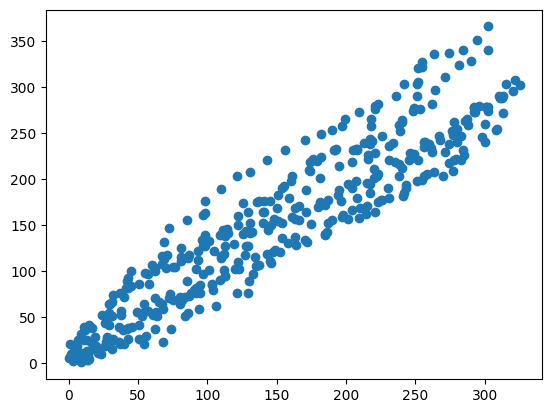

In [ ]:
plt.scatter(cities[:, 0], cities[:, 1])

In [ ]:
simulated_annealing = SimulatedAnnealing(100, 0.0001, cities)

In [ ]:
start = time.time()
cities_new, init_energy_func, final_energy_func = simulated_annealing.process()
end = time.time()

Выходные данные были обрезаны до нескольких последних строк (5000).
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608856
Текущее расстояние — 4071.637191608

In [ ]:
print(end - start)

308.63470482826233


In [ ]:
print(f'Изначальное расстояние пути — {init_energy_func}\nКонечное расстояние пути — {final_energy_func}')

Изначальное расстояние пути — 61468.14009131509
Конечное расстояние пути — 4000.228058440407


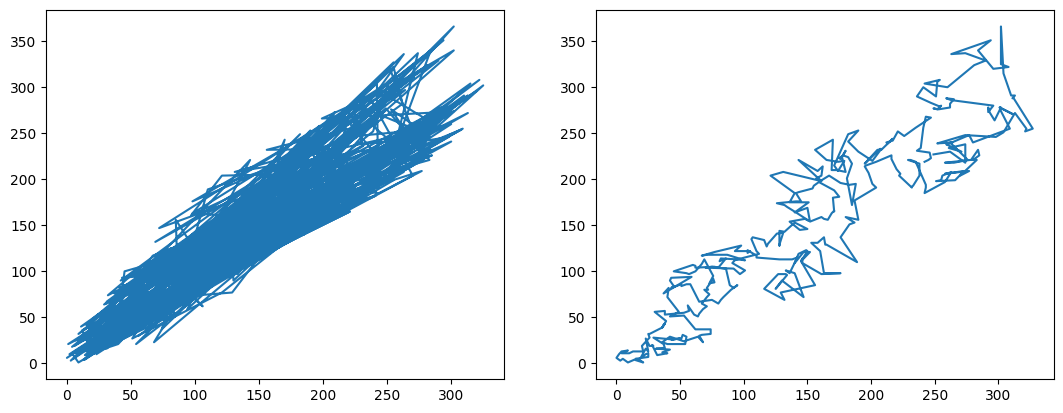

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(13)

ax1.plot(cities[:, 0], cities[:, 1])
ax2.plot(cities_new[:, 0], cities_new[:, 1])